In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression as reg
from sklearn.metrics import mean_squared_error



In [176]:
def f(x):
  return x**2


def generate_X_for_predict(num = 1000):
  return np.linspace(-10, 10, num).reshape(-1, 1)


def generate_data(num = 20):
  X = np.linspace(-10, 10, num)
  noise = np.random.normal(loc=0, scale=15, size=num)
  Y =  X**2 + noise
  return X.reshape(-1, 1), Y

In [178]:
train_X, train_Y = generate_data()
test_X, test_Y = generate_data()

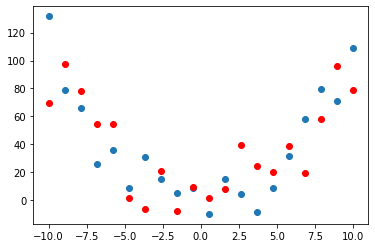

In [172]:
plt.scatter(train_X, train_Y)
plt.scatter(test_X, test_Y, color='red')
plt.show()

In [173]:
def exec_and_plot(DegreeSet, show_graph=False):
    errors = []
    test_errors = []
    for dg in DegreeSet:
        pf = PF(degree = dg)
        x_poly = pf.fit_transform(train_X)
        poly_reg = reg()
        poly_reg.fit(x_poly, train_Y)
        polypred = poly_reg.predict(x_poly)

        test_pred = poly_reg.predict(pf.fit_transform(test_X))

        error = mean_squared_error(train_Y, polypred)
        test_error = mean_squared_error(test_Y, test_pred)
        # print("次元{0}: => 訓練誤差{1}".format(dg, error))
        errors.append(error)
        test_errors.append(test_error)

        if show_graph:
            plt.scatter(train_X, train_Y)
            plt.plot(train_X, polypred, color="red")
            plt.legend()
            plt.title("Regression")
            plt.show()
    return errors, test_errors

In [183]:
degree_set = range(30)
errors, test_errors = exec_and_plot(degree_set)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


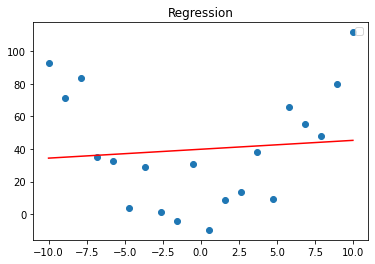

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


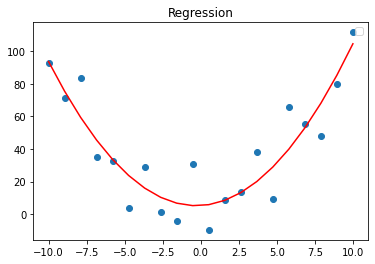

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


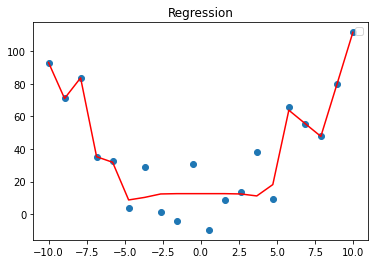

In [182]:
degree_set_2 = [1, 2, 20]
errors, test_errors = exec_and_plot(degree_set_2, True)

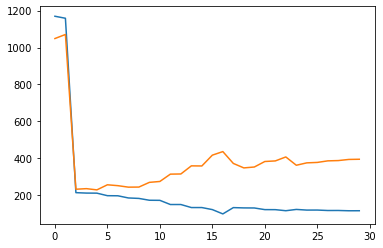

In [184]:
plt.plot(degree_set, errors)
plt.plot(degree_set, test_errors)